# **Unveiling the Balance in Gender Representation in the Movie Industry**

PROJECT - MILESTONE 2

TODO: ADD THE SUMMARY OF OUR GOAL

Load the CMU movie dataset

In this project, our main dataset is CMU movie dataset which is taken from https://www.cs.cmu.edu/~ark/personas/. All of the data taken from the website is collected under /dataset folder in the project.


In [6]:
import json
import os
import ast  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns

## **Loading data**

In [11]:
folder_path= "dataset"
character_metadata_path = os.path.join(folder_path, "character.metadata.tsv")
movie_metadata_path = os.path.join(folder_path, "movie.metadata.tsv")

tvtropes_path = os.path.join(folder_path, 'tvtropes.clusters.txt')
name_clusters_path = os.path.join(folder_path, 'name.clusters.txt')
plot_summary_path = os.path.join(folder_path, 'plot_summaries.txt')


In [12]:
character_df=pd.read_csv(character_metadata_path,sep="\t",names=[
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
])
movie_df=pd.read_csv(movie_metadata_path,sep="\t",names=["Wikipedia movie ID",
                                                                "Freebase movie ID",
                                                                "Movie name",
                                                                "Movie release date",
                                                                "Movie box office revenue",
                                                                "Movie runtime",
                                                                "Movie languages",
                                                                "Movie countries",
                                                                "Movie genres"])


# Read tvtropes.clusters.txt and create a dataframe
tvtropes_data = pd.read_csv(tvtropes_path, sep='\t', header=None)
tvtropes_data.columns = ['Character Type', 'Info']

# Read name.clusters.txt and create a dataframe
name_data = pd.read_csv(name_clusters_path, sep='\t', header=None)
name_data.columns = ['Character Name', 'ID']


# Read plot_summaries.txt and create a dataframe
summary_data = pd.read_csv(plot_summary_path, sep='\t', header=None)
summary_data.columns = ['ID', 'summary']

## **Preprocessing**

### **Preprocessing the character meta-data**

In [13]:
character_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [14]:
# we wont use Freebase character/actor map ID, Freebase character ID, Freebase actor ID, so they are dropped
character_df = character_df.drop(['Freebase character ID', 'Freebase actor ID'], axis=1)

In [15]:
character_df['Movie release year'] = character_df['Movie release date'].str[:4]

### **Preprocessing for Movie Metadata**

In [16]:
movie_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [17]:
# convert the json parts into list of values (since we wont use the freebase ids)
def extract_values(str_list):
    return [list(ast.literal_eval(d).values()) if isinstance(d, str) else [] for d in str_list]


# Apply the function to the specific columns
movie_df['Movie languages'] = extract_values(movie_df['Movie languages'])
movie_df['Movie countries'] = extract_values(movie_df['Movie countries'])
movie_df['Movie genres'] = extract_values(movie_df['Movie genres'])


#first 4 characters from each release date - only year
movie_df['Movie release year'] = movie_df['Movie release date'].str[:4]

In [18]:
movie_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983


### **Preprocess for TvTropes data**

In [19]:
tvtropes_data.head()

,Character Type,Info
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [20]:
# open the values in Info section of tvtropes
tvtropes_data = pd.concat([tvtropes_data['Character Type'], tvtropes_data['Info'].apply(lambda x: pd.Series(json.loads(x)))], axis=1)
tvtropes_data.head()

,Character Type,char,movie,id,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


### **Preprocessing for Name and Summary data**

In [21]:
name_data.head()

,Character Name,ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [22]:
# change the naming for consistency
name_data = name_data.rename(columns={'ID': 'Freebase character/actor map ID'})

In [23]:
summary_data.head()

,ID,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [24]:
# change the naming for consistency
summary_data = summary_data.rename(columns={'ID': 'Wikipedia movie ID'})

## **Data Analysis over the CMU datasets**

General Analysis:
    
In this section, we have focused on analyzing the general aspect of the movie data rather than only focusing the gender.
1) Missing Data Analysis
2) Number of Movies Released Over 5 Year Intervals
3) The Movie Distribution for Popular Regions of the Films

### **Missing-Data Analysis**

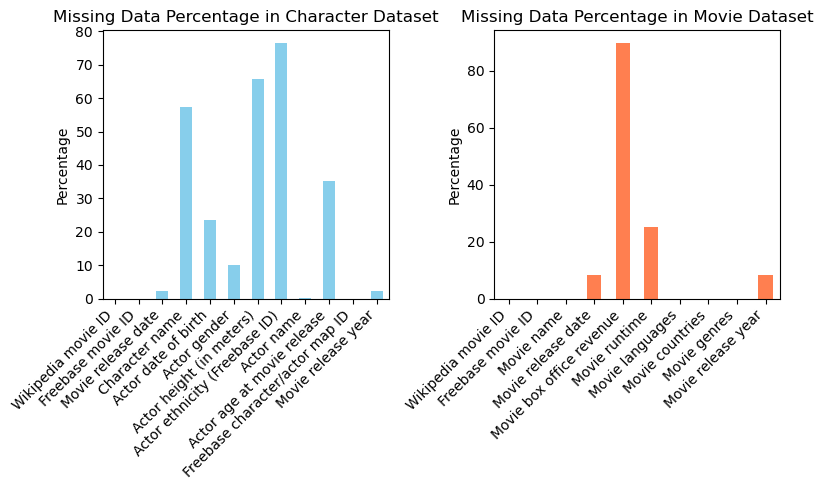

In [25]:
#evaluate the missing values for each dataset
missing_percentage_character_df = (character_df.isnull().sum() / len(character_df)) * 100
missing_percentage_movie_df = (movie_df.isnull().sum() / len(movie_df)) * 100

# Creating bar charts for each DataFrame
plt.figure(figsize=(8, 5))

# Character DataFrame missing values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
missing_percentage_character_df.plot(kind='bar', color='skyblue')
plt.title('Missing Data Percentage in Character Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Movie DataFrame missing values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
missing_percentage_movie_df.plot(kind='bar', color='coral')
plt.title('Missing Data Percentage in Movie Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjusts the plots to prevent overlap
plt.show()


### **Number of Movies Released Over 5 Year Intervals**

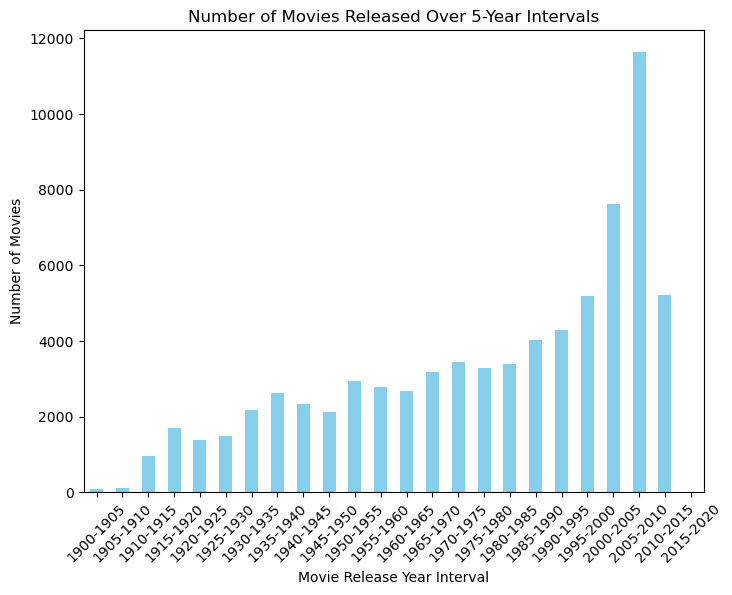

In [26]:
movie_df['Movie release year'] = pd.to_numeric(movie_df['Movie release year'], errors='coerce')
movie_df = movie_df.dropna(subset=['Movie release year'])

movie_df['Movie release year'] = movie_df['Movie release year'].astype(int)
min_year = 1900  # before that there are less number of movies, discarded.
max_year = movie_df['Movie release year'].max()
year_bins = np.arange(min_year, max_year + 5, 5)
year_labels = [f'{int(y)}-{int(y+5)}' for y in year_bins[:-1]]

# Categorize each row into a 20-year interval
movie_df['Year Interval'] = pd.cut(movie_df['Movie release year'], bins=year_bins, labels=year_labels, right=False)
movies_over_intervals = movie_df.groupby('Year Interval').size()

plt.figure(figsize=(8, 6))
movies_over_intervals.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Over 5-Year Intervals')
plt.xlabel('Movie Release Year Interval')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [27]:
movie_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Year Interval
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,2000-2005
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000,2000-2005
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,1985-1990
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,1985-1990
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983,1980-1985


### **The Movie Distribution for Popular Regions of the Films**

In [28]:
countries_series = pd.Series([countries for sublist in movie_df["Movie countries"] for countries in sublist])
countries_count = countries_series.value_counts()
countries_count

United States of America    33197
India                        7764
United Kingdom               7452
France                       4199
Italy                        3017
                            ...  
Republic of China               1
Macau                           1
Palestinian Territories         1
German Language                 1
Ukranian SSR                    1
Name: count, Length: 146, dtype: int64

In [30]:
num_languages_above_threshold = (countries_count >= 1500).sum()
num_languages_below_threshold = (countries_count < 1500).sum()

print(f"There are {len(countries_count)} countries, but {num_languages_below_threshold} of them only have less than 1500 movies.")


There are 146 countries, but 138 of them only have less than 1500 movies.


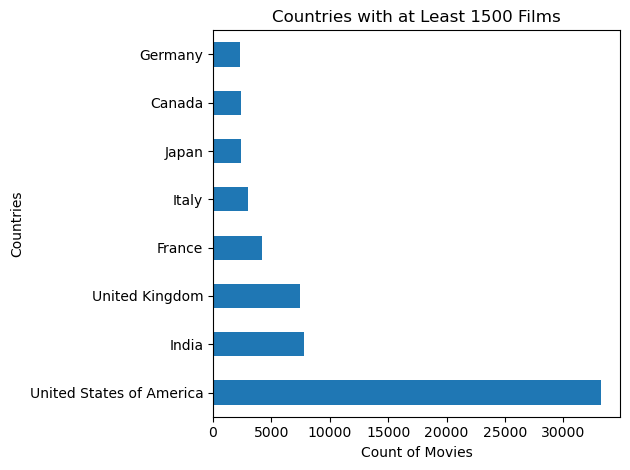

In [31]:
threshold = 1500

significant_countries_count = countries_count[countries_count >= threshold]

ax = significant_countries_count.plot(kind="barh")  
ax.set(xlabel="Count of Movies", ylabel="Countries")
ax.set_title(f"Countries with at Least {threshold} Films")
plt.tight_layout() 
plt.show()

## **Gender Based Analysis Based on CMU Movie Dataset**

* Gender Distribution over Years
* Actor Age at Movie Release based on Genders
* Comparison of number of male and female characters in top 20 grossing films
* The percentage of films that includes more female characters than male characters

### **Gender Distribution over Years**

In [32]:
character_df['Movie release year'] = pd.to_numeric(character_df['Movie release year'], errors='coerce')
character_df = character_df.dropna(subset=['Movie release year'])

character_df['Movie release year'] = character_df['Movie release year'].astype(int)
min_year = 1900  # before that there are less number of movies, discarded.
max_year = character_df['Movie release year'].max()
year_bins = np.arange(min_year, max_year + 10, 10)
year_labels = [f'{int(y)}-{int(y+10)}' for y in year_bins[:-1]]

# Categorize each row into a 20-year interval
character_df['Year Interval'] = pd.cut(character_df['Movie release year'], bins=year_bins, labels=year_labels, right=False)
gender_distribution_over_time = character_df.groupby(['Year Interval', 'Actor gender']).size().unstack()

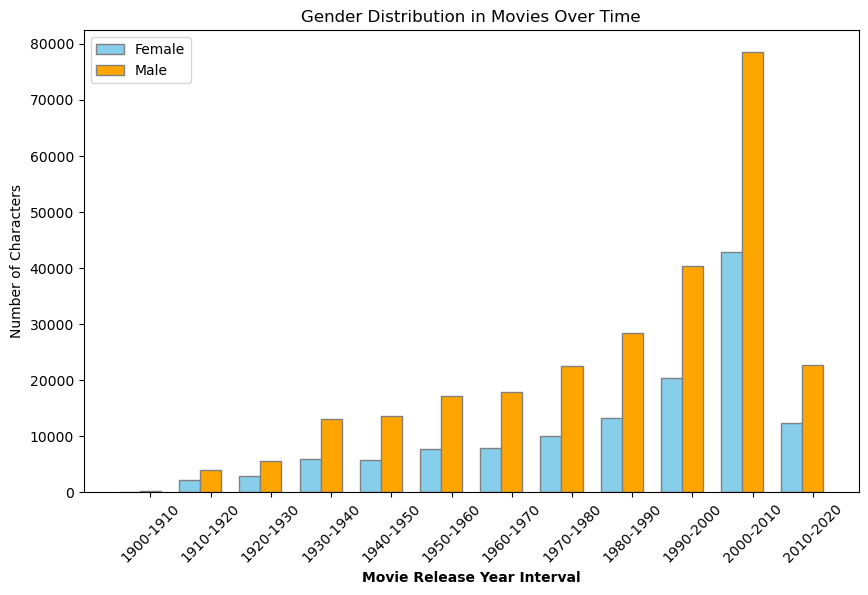

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(gender_distribution_over_time))
r2 = [x + bar_width for x in r1]

# Make the plot
ax.bar(r1, gender_distribution_over_time['F'], color='skyblue', width=bar_width, edgecolor='grey', label='Female')
ax.bar(r2, gender_distribution_over_time['M'], color='orange', width=bar_width, edgecolor='grey', label='Male')

# Add xticks on the middle of the group bars
ax.set_xlabel('Movie Release Year Interval', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(gender_distribution_over_time))])
ax.set_xticklabels(gender_distribution_over_time.index)
ax.set_ylabel('Number of Characters')
ax.set_title('Gender Distribution in Movies Over Time')

# Create legend & Show graphic
ax.legend()
plt.xticks(rotation=45)
plt.show()

### **Gender Distribution in Top 20 Movie Genres**

In [34]:
merged_df = pd.merge(
    movie_df,
    character_df,
    on=['Wikipedia movie ID', 'Freebase movie ID'],
    how='left',  
    suffixes=('_movie', '_character')  
)


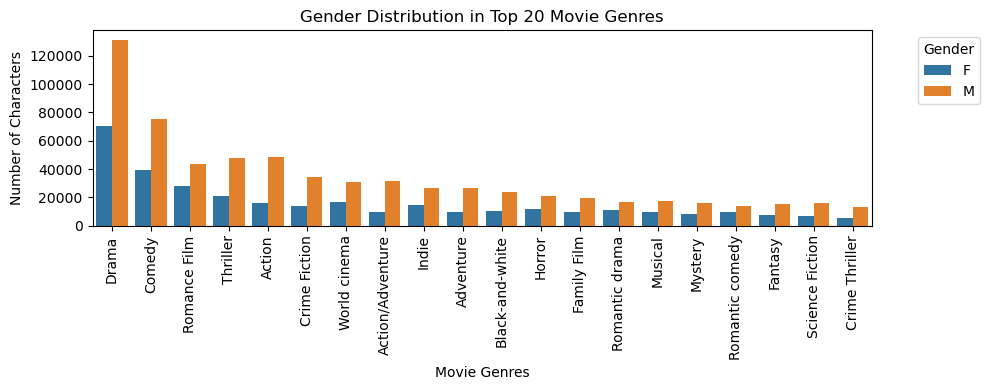

In [35]:
merged_df['Movie genres'] = merged_df['Movie genres'].apply(lambda x: x if isinstance(x, list) else [])
genre_gender_df = merged_df.explode('Movie genres')
genre_gender_distribution = genre_gender_df.groupby(['Movie genres', 'Actor gender']).size().unstack().fillna(0)

top_n = 20
top_genres = genre_gender_distribution.sum(axis=1).nlargest(top_n).index

top_genre_gender_distribution = genre_gender_distribution.loc[top_genres]

top_genre_gender_distribution = top_genre_gender_distribution.stack().reset_index()
top_genre_gender_distribution.columns = ['Movie genres', 'Actor gender', 'Number of Characters']

plt.figure(figsize=(10, 4))
sns.barplot(x='Movie genres', y='Number of Characters', hue='Actor gender', data=top_genre_gender_distribution)
plt.title('Gender Distribution in Top 20 Movie Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Number of Characters')
plt.xticks(rotation=90)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## **Convert data to more workable form**

In [54]:
# Helper function to clean up the columns which are stored as a json.
def explode_cols_(_df, explode_col): 
    _df_long = _df.explode(column=explode_col)
    return _df_long.reset_index(drop=True)

In [55]:
# more workable genre df
genre_df = explode_cols_(
    movie_df, 
    explode_col="Movie genres"
    )

# more workable language df
language_df = explode_cols_(
    movie_df, 
    explode_col="Movie languages"
    )

# more workable language df
country_df = explode_cols_(
    movie_df, 
    explode_col="Movie countries"
    )

# remove all the na revenue rows
revenue_df = movie_df.loc[:, ["Wikipedia movie ID", "Freebase movie ID", "Movie box office revenue"]].dropna(subset=["Movie box office revenue"])
na_revenue_bool_ = movie_df.loc[:, "Movie box office revenue"].isna()
na_revenue_df = movie_df.loc[na_revenue_bool_, :]

movie_df["Release_year"] = movie_df.loc[:, "Movie release date"].str.slice(0, 4)
year_df = movie_df.loc[:, ["Wikipedia movie ID", "Freebase movie ID", "Release_year"]]

In [56]:
movie_df.loc[year_df.loc[:, "Release_year"]=="1010", :]

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Year Interval,Release_year
62836,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.0,"[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",1010,NaN,1010


In [57]:
movie_df.loc[year_df.loc[:, "Release_year"]=="1888", :]

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Year Interval,Release_year
57963,1082508,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,[Silent film],[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",1888,NaN,1888


### **Average gender of male and female actors**

<Axes: xlabel='Actor gender', ylabel='Actor age at movie release'>

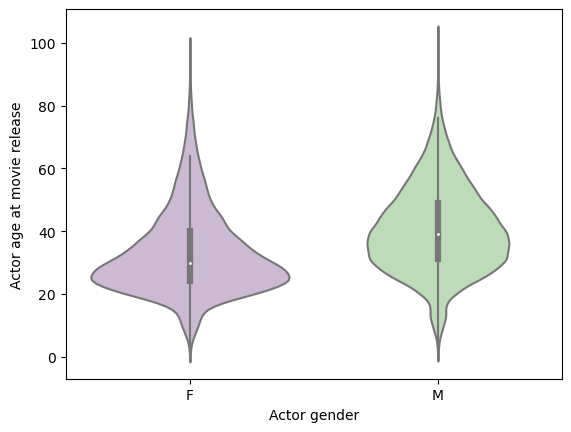

In [58]:
character_df_ = character_df.dropna(subset=["Actor gender", "Actor age at movie release"])
character_df_ = character_df_.loc[character_df_.loc[:, "Actor age at movie release"]>0, :]

sns.violinplot(x="Actor gender", y="Actor age at movie release", data=character_df_, palette="PRGn")

**Note** Here we do not perform a statistical test since the number of samples is too large. Any p-value calculated with this number of samples will end up being close to 0. Which is the case here.

In [59]:
female_characters = character_df_.loc[:, "Actor gender"] == "F"
male_characters = character_df_.loc[:, "Actor gender"] == "M"

print("Number of female characters with valid age:", np.sum(female_characters))
print("Number of male characters with valid age:", np.sum(male_characters))

Number of female characters with valid age: 99100
Number of male characters with valid age: 191249


### **Temporal change of percentage of male and female actors**

In [63]:
character_df_filter_year = character_df.dropna(subset=["Movie release year"])

# for every movie, count the number of female and male actors 
gender_count_per_movie = character_df_filter_year.groupby(
    by=["Wikipedia movie ID"]).value_counts(subset=["Actor gender"]).reset_index()

In [66]:
pivoted_table = gender_count_per_movie.pivot_table(
    index = ["Wikipedia movie ID"], 
    columns="Actor gender", 
    values="count",
    fill_value=0).reset_index()
pivoted_table.rename_axis(None, axis=1)

# calculate the percentage of male and female actors
pivoted_table.loc[:, "total"] = pivoted_table.loc[:, "F"] + pivoted_table.loc[:, "M"] 
pivoted_table.loc[:, "M_percentage"] = 100 * pivoted_table.loc[:, "M"] / pivoted_table.loc[:, "total"]
pivoted_table.loc[:, "F_percentage"] = 100 * pivoted_table.loc[:, "F"] / pivoted_table.loc[:, "total"]

pivoted_table = pd.merge(pivoted_table, year_df,left_on="Wikipedia movie ID", right_on="Wikipedia movie ID")

# melt table for easier plotting
melted_table = pd.melt(
    pivoted_table, 
    id_vars=["Wikipedia movie ID", "Release_year"], 
    value_vars=["M_percentage", "F_percentage"],
    value_name="percentage")

In [67]:
from scipy.stats import norm

confidence_level=0.95
z_score_position = (1 + confidence_level)/2
# Find the Z-score for a 95% confidence interval
Z = norm.ppf(z_score_position)

stats_ = melted_table.groupby(by=["Release_year", 'variable'])["percentage"].aggregate([np.mean, np.std, len]).reset_index()

In [68]:
# some years don't have enough movies. We set an abitrary cut-off of 10 movies for further testing
movie_df.loc[:, "Release_year"].value_counts().reset_index().tail(10)
stats_ = stats_.loc[stats_.loc[:, "len"] >= 10, :]

Text(0.5, 1.0, 'Average percentage of Male and Female in films')

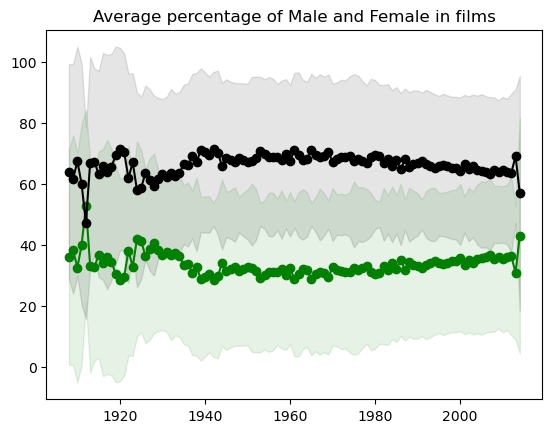

In [69]:
stats_.loc[:, "Release_year"] = pd.to_numeric(stats_.loc[:, "Release_year"])

stats_f = stats_.loc[stats_.loc[:, "variable"]=="F_percentage", :]
stats_m = stats_.loc[stats_.loc[:, "variable"]=="M_percentage", :]

# Plotting for Left-Handed Pitchers
plt.plot(stats_f.loc[:, "Release_year"], stats_f.loc[:, "mean"],
        marker='o', linestyle='-', color='green', label='Left-Handed')
plt.fill_between(
    stats_f.loc[:, "Release_year"].astype(float), 
    stats_f.loc[:, "mean"] - stats_f.loc[:, "std"],
    stats_f.loc[:, "mean"] + stats_f.loc[:, "std"], color='green', alpha=0.1)

plt.errorbar(stats_m.loc[:, "Release_year"], stats_m.loc[:, "mean"],
            marker='o', linestyle='-', color='black', label='Left-Handed')
plt.fill_between(
    stats_m.loc[:, "Release_year"].astype(float), 
    stats_m.loc[:, "mean"] - stats_m.loc[:, "std"],
    stats_m.loc[:, "mean"] + stats_m.loc[:, "std"], color='black', alpha=0.1)

plt.title("Average percentage of Male and Female in films")

**Observation** We see a constantly low percentage of female actresses in movies in every year. We have a large overlap in the confidence intervals, however, the percentage is low in every year for female except for one year. 

We have a constant under-representation of women across all the years. 

The reason we opt not to perform a statistical test here is because of the number of films in each year. Most years have upwards of hundreds to thousands of films. Because of these high numbers, we will alway get a very small p-value. 

In fact, until the 2014, we do not see a sizeable increase in the proportion of female actors in films.

### **Comparison of number of male and female characters in top 20 grossing films**

In [70]:
character_count = character_df.groupby('Wikipedia movie ID')['Actor gender'].value_counts().unstack().fillna(0)
character_count['Total Characters'] = character_count['M'] + character_count['F']

top_n = 20 # Top 20 grossing films
top_movies = movie_df.nlargest(top_n, 'Movie box office revenue')

top_movies = pd.merge(
    top_movies,
    character_count,
    on=['Wikipedia movie ID'],
    how='left',  
    suffixes=('_top_movies', '_character_count')  
)
top_movies.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Year Interval,Release_year,F,M,Total Characters
0,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"[English Language, Spanish Language]","[United States of America, United Kingdom]","[Thriller, Science Fiction, Adventure, Compute...",2009,2005-2010,2009,4.0,10.0,14.0
1,52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"[Italian Language, English Language, French La...",[United States of America],"[Tragedy, Costume drama, Historical fiction, A...",1997,1995-2000,1997,5.0,17.0,22.0
2,22114132,/m/062zm5h,The Avengers,2012-04-11,1.511758e+09,137.0,"[Russian Language, English Language]",[United States of America],"[Science Fiction, Action]",2012,2010-2015,2012,8.0,19.0,27.0
3,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09,130.0,[English Language],"[United States of America, United Kingdom]","[Drama, Mystery, Fantasy, Adventure]",2011,2010-2015,2011,21.0,30.0,51.0
4,25001260,/m/0872p_c,Transformers: Dark of the Moon,2011-06-23,1.123747e+09,157.0,[English Language],[United States of America],"[Alien Film, Science Fiction, Action, Adventure]",2011,2010-2015,2011,3.0,22.0,25.0


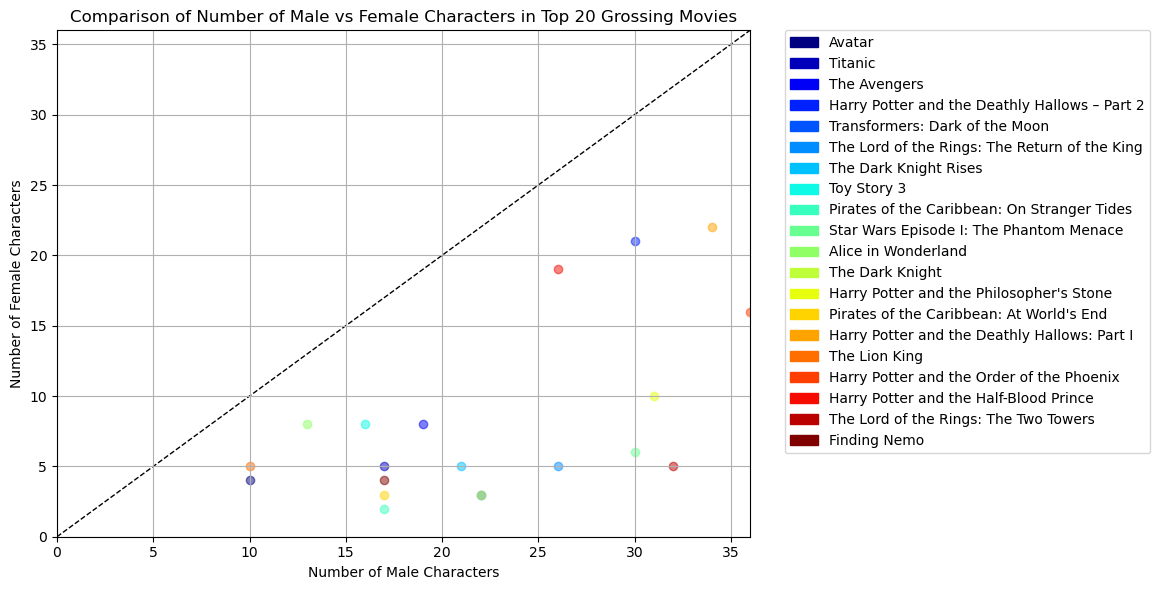

In [71]:
top_20_movies = top_movies.head(20)
colors = plt.cm.jet(np.linspace(0, 1, len(top_20_movies)))

max_num_characters = max(top_20_movies['M'].max(), top_20_movies['F'].max())

plt.figure(figsize=(14, 6))
for i, (index, row) in enumerate(top_20_movies.iterrows()):
    plt.scatter(row['M'], row['F'], color=colors[i], alpha=0.5)

# Setting the same scale for both axes
plt.xlim(0, max_num_characters)
plt.ylim(0, max_num_characters)

plt.plot([0, max_num_characters], [0, max_num_characters], 'k--', lw=1, zorder=0)

plt.xlabel('Number of Male Characters')
plt.ylabel('Number of Female Characters')
plt.title('Comparison of Number of Male vs Female Characters in Top 20 Grossing Movies')
plt.grid(True)

# Creating a custom legend
legend_patches = [mpatches.Patch(color=colors[i], label=row['Movie name']) for i, row in top_20_movies.iterrows()]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjusting the layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()


### **The percentage of films that includes more female characters than male characters**

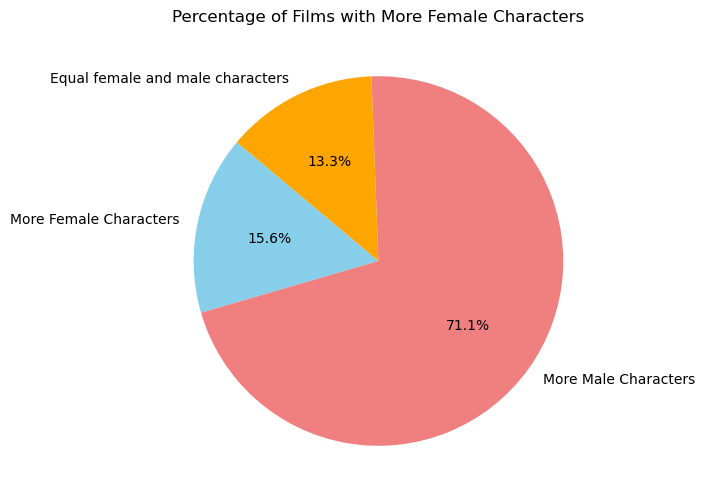

In [39]:

films_with_more_female_characters = character_count[character_count['F'] > character_count['M']].shape[0]
films_with_more_male_characters = character_count[character_count['F'] < character_count['M']].shape[0]
films_with_equal_characters = character_count[character_count['F'] == character_count['M']].shape[0]

# Now we determine the total number of films
total_films = character_count.shape[0]

# The percentage of films with more female characters
percentage_more_female = (films_with_more_female_characters / total_films) * 100
percentage_more_male = (films_with_more_male_characters / total_films) * 100
percentage_equal = (films_with_equal_characters / total_films) * 100

# Now let's create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    [percentage_more_female, percentage_more_male, percentage_equal],
    labels=['More Female Characters', 'More Male Characters', 'Equal female and male characters'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral', 'orange']
)

plt.title('Percentage of Films with More Female Characters')
plt.show()


## **Additional data generation**

We collected additional data by following the below steps:
* Dataset creation using Freebase IDs and Wikidata API to extract IMDb IDs.
* Utilization of the TMDB API for acquiring gender information of cast and crew members.

The results are stored in movie_with_gender_info.csv file.

In [41]:
TMDB_data_path = os.path.join(folder_path, "movie_with_gender_info.csv")
movie_with_gender_info= pd.read_csv(TMDB_data_path, index_col=0)
movie_with_gender_info.head(2)

,title,cast,crew,cast_gender,crew_gender,combined_genders,all_gender_percentages,cast_gender_percentages,crew_gender_percentages
0,Ghosts of Mars,"[{'adult': False, 'gender': 1, 'id': 57395, 'k...","[{'adult': False, 'gender': 2, 'id': 8340, 'kn...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","[2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, ...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","{1: 38.46153846153847, 2: 47.43589743589743, 0...","{1: 40.74074074074074, 2: 55.55555555555556, 0...","{2: 43.13725490196079, 0: 19.607843137254903, ..."
1,Getting Away with Murder: The JonBenét Ramsey ...,[],"[{'adult': False, 'gender': 0, 'id': 2929954, ...",[],[0],[0],{0: 100.0},{},{0: 100.0}


Cast & Crew Gender Distribution

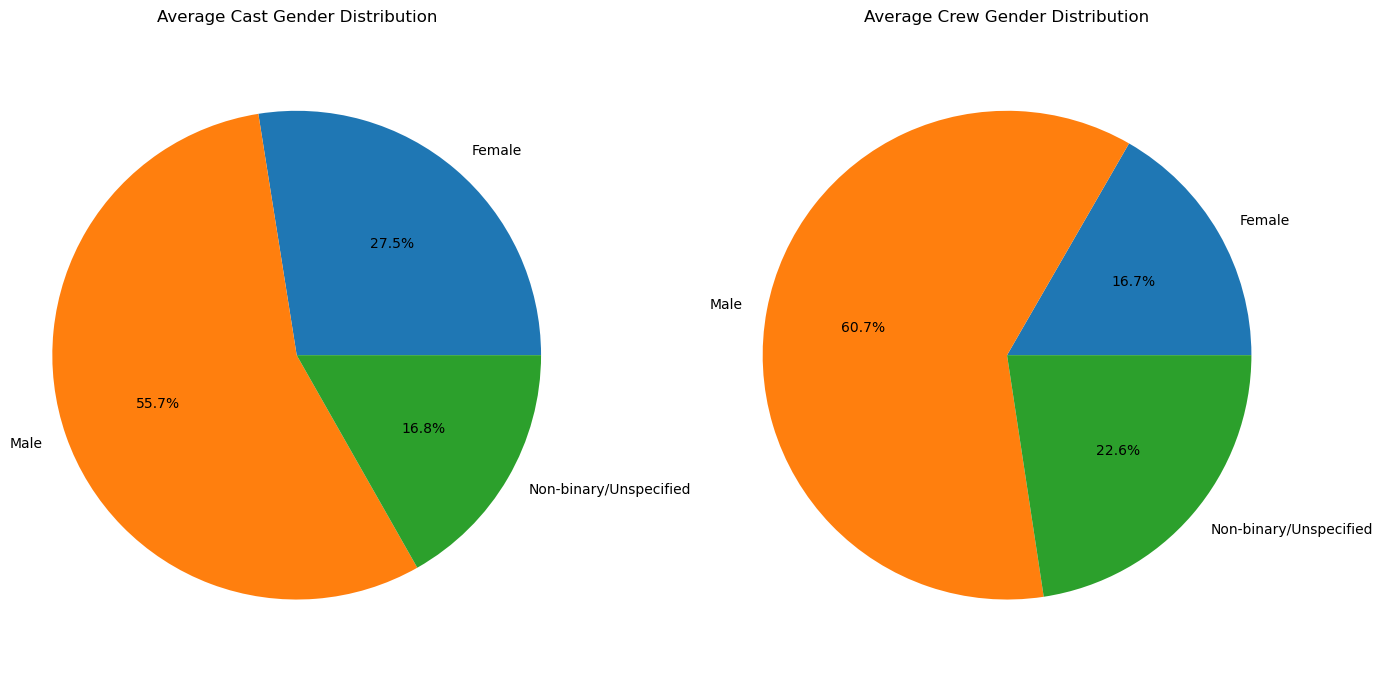

In [42]:
import ast  
def str_to_dict(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return {}
    
df=movie_with_gender_info.copy()
df['cast_gender_percentages'] = df['cast_gender_percentages'].apply(str_to_dict)
df['crew_gender_percentages'] = df['crew_gender_percentages'].apply(str_to_dict)

mean_cast_gender = df['cast_gender_percentages'].apply(pd.Series).mean()
mean_crew_gender = df['crew_gender_percentages'].apply(pd.Series).mean()

cast_sizes = [mean_cast_gender.get(1, 0), mean_cast_gender.get(2, 0), 100 - (mean_cast_gender.get(1, 0) + mean_cast_gender.get(2, 0))]
crew_sizes = [mean_crew_gender.get(1, 0), mean_crew_gender.get(2, 0), 100 - (mean_crew_gender.get(1, 0) + mean_crew_gender.get(2, 0))]
labels = ['Female', 'Male', 'Non-binary/Unspecified']

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].pie(cast_sizes, labels=labels, autopct='%1.1f%%')
ax[0].set_title('Average Cast Gender Distribution')
ax[0].axis('equal') 

# Plotting the pie chart for crew
ax[1].pie(crew_sizes, labels=labels, autopct='%1.1f%%')
ax[1].set_title('Average Crew Gender Distribution')
ax[1].axis('equal')  

plt.tight_layout()
plt.show()


Gender Diversity and Film Performance

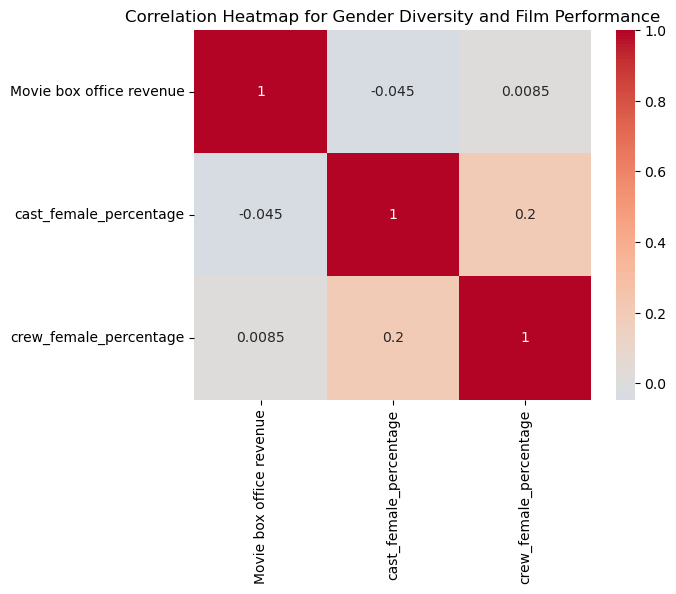

In [43]:
movie_with_gender_info['cast_gender_percentages'] = movie_with_gender_info['cast_gender_percentages'].apply(str_to_dict)
movie_with_gender_info['crew_gender_percentages'] = movie_with_gender_info['crew_gender_percentages'].apply(str_to_dict)

# Merge the DataFrames on 'Movie name'
merged_df = pd.merge(
    movie_df,
    movie_with_gender_info,
    left_on='Movie name',
    right_on='title',
    how='inner'
)

merged_df['cast_female_percentage'] = merged_df['cast_gender_percentages'].apply(lambda x: x.get(1, 0))
merged_df['crew_female_percentage'] = merged_df['crew_gender_percentages'].apply(lambda x: x.get(1, 0))

numerical_columns = ['Movie box office revenue', 'cast_female_percentage', 'crew_female_percentage']
correlation_data = merged_df[numerical_columns]

correlation_matrix = correlation_data.corr()

# Plotting the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Gender Diversity and Film Performance')
plt.show()

* Between the box office revenue of a movie and the percentage of female cast members: The relationship is very weak and slightly negative, shows that an increase in female cast members doesn't significantly affect box office revenue.
* Between the box office revenue and the percentage of female crew members : There is an extremely weak and slightly positive correlation, shows that higher female representation in the crew has almost no impact on box office revenue.

Temporal Trends in Gender Representation

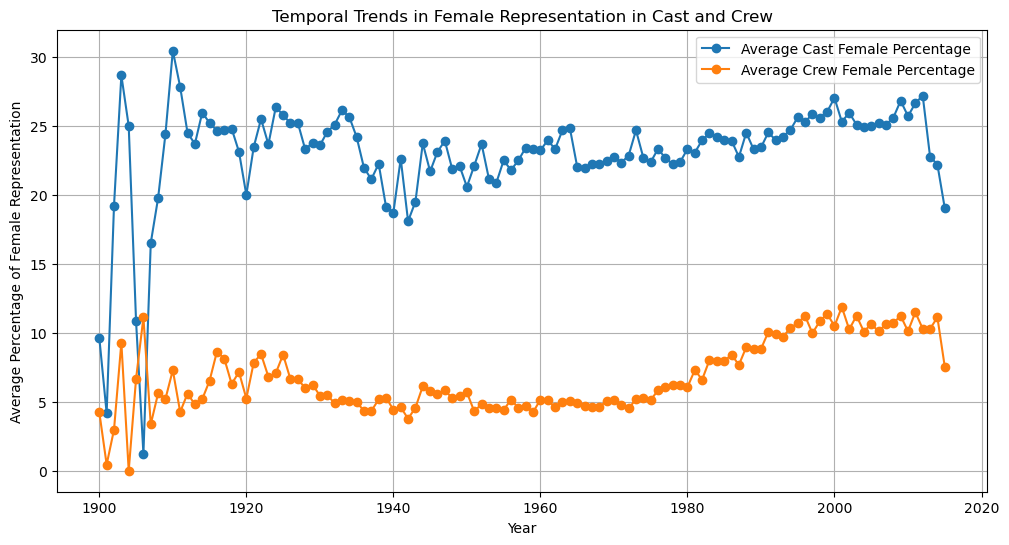

In [44]:
# Plotting temporal trends
filtered_df = merged_df[(merged_df["Movie release year"] >= 1900) & (merged_df["Movie release year"] <= 2015)]

average_cast_female_per_year = filtered_df.groupby('Movie release year')['cast_female_percentage'].mean()
average_crew_female_per_year = filtered_df.groupby('Movie release year')['crew_female_percentage'].mean()

# Plotting the averages
plt.figure(figsize=(12, 6))
plt.plot(average_cast_female_per_year, label="Average Cast Female Percentage", marker='o')
plt.plot(average_crew_female_per_year, label="Average Crew Female Percentage", marker='o')
plt.xlabel("Year")
plt.ylabel("Average Percentage of Female Representation")
plt.title("Temporal Trends in Female Representation in Cast and Crew")
plt.legend()
plt.grid(True)
plt.show()

Role-Specific Gender Distribution

In [45]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import defaultdict
df = merged_df.copy()

# Convert string representation to list
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x) if x else [])
df['crew'] = df['crew'].apply(lambda x: ast.literal_eval(x) if x else [])

# Define roles of interest
roles_of_interest = ['Directing', 'Acting', 'Writing', 'Production', 'Art', 'Sound', 'Crew']

# Function to analyze role-specific gender distribution
def analyze_role_gender(data, roles):
    gender_distribution = defaultdict(lambda: defaultdict(int))
    for entry in data:
        for person in entry:
            role = person.get('known_for_department', '')
            gender = person.get('gender', 0)  # 0 for unspecified, 1 for female, 2 for male
            if role in roles:
                gender_distribution[role][gender] += 1
    return gender_distribution

# Applying the analysis
cast_gender_distribution = analyze_role_gender(df['cast'], roles_of_interest)
crew_gender_distribution = analyze_role_gender(df['crew'], roles_of_interest)

In [49]:
cast_gender_distribution

defaultdict(<function __main__.analyze_role_gender.<locals>.<lambda>()>,
            {'Acting': defaultdict(int,
                         {1: 306269, 2: 684004, 0: 277774, 3: 290}),
             'Crew': defaultdict(int, {2: 5230, 0: 2100, 1: 783}),
             'Directing': defaultdict(int, {2: 10387, 0: 2246, 1: 921, 3: 7}),
             'Production': defaultdict(int, {2: 3697, 0: 2753, 1: 922}),
             'Sound': defaultdict(int, {2: 1666, 0: 1001, 1: 150}),
             'Art': defaultdict(int, {2: 625, 0: 656, 1: 131}),
             'Writing': defaultdict(int, {2: 4384, 0: 2580, 1: 730})})

In [47]:
crew_gender_distribution

defaultdict(<function __main__.analyze_role_gender.<locals>.<lambda>()>,
            {'Art': defaultdict(int, {0: 71148, 2: 58727, 1: 13559, 3: 4}),
             'Directing': defaultdict(int,
                         {2: 105061, 0: 38986, 1: 12629, 3: 6}),
             'Acting': defaultdict(int, {2: 41891, 1: 8385, 0: 11378, 3: 20}),
             'Production': defaultdict(int,
                         {1: 38705, 2: 89415, 0: 100557, 3: 15}),
             'Crew': defaultdict(int, {1: 15056, 2: 53277, 0: 66604}),
             'Sound': defaultdict(int, {0: 84245, 2: 112501, 1: 13135, 3: 4}),
             'Writing': defaultdict(int,
                         {0: 39284, 2: 71714, 1: 10014, 3: 11})})

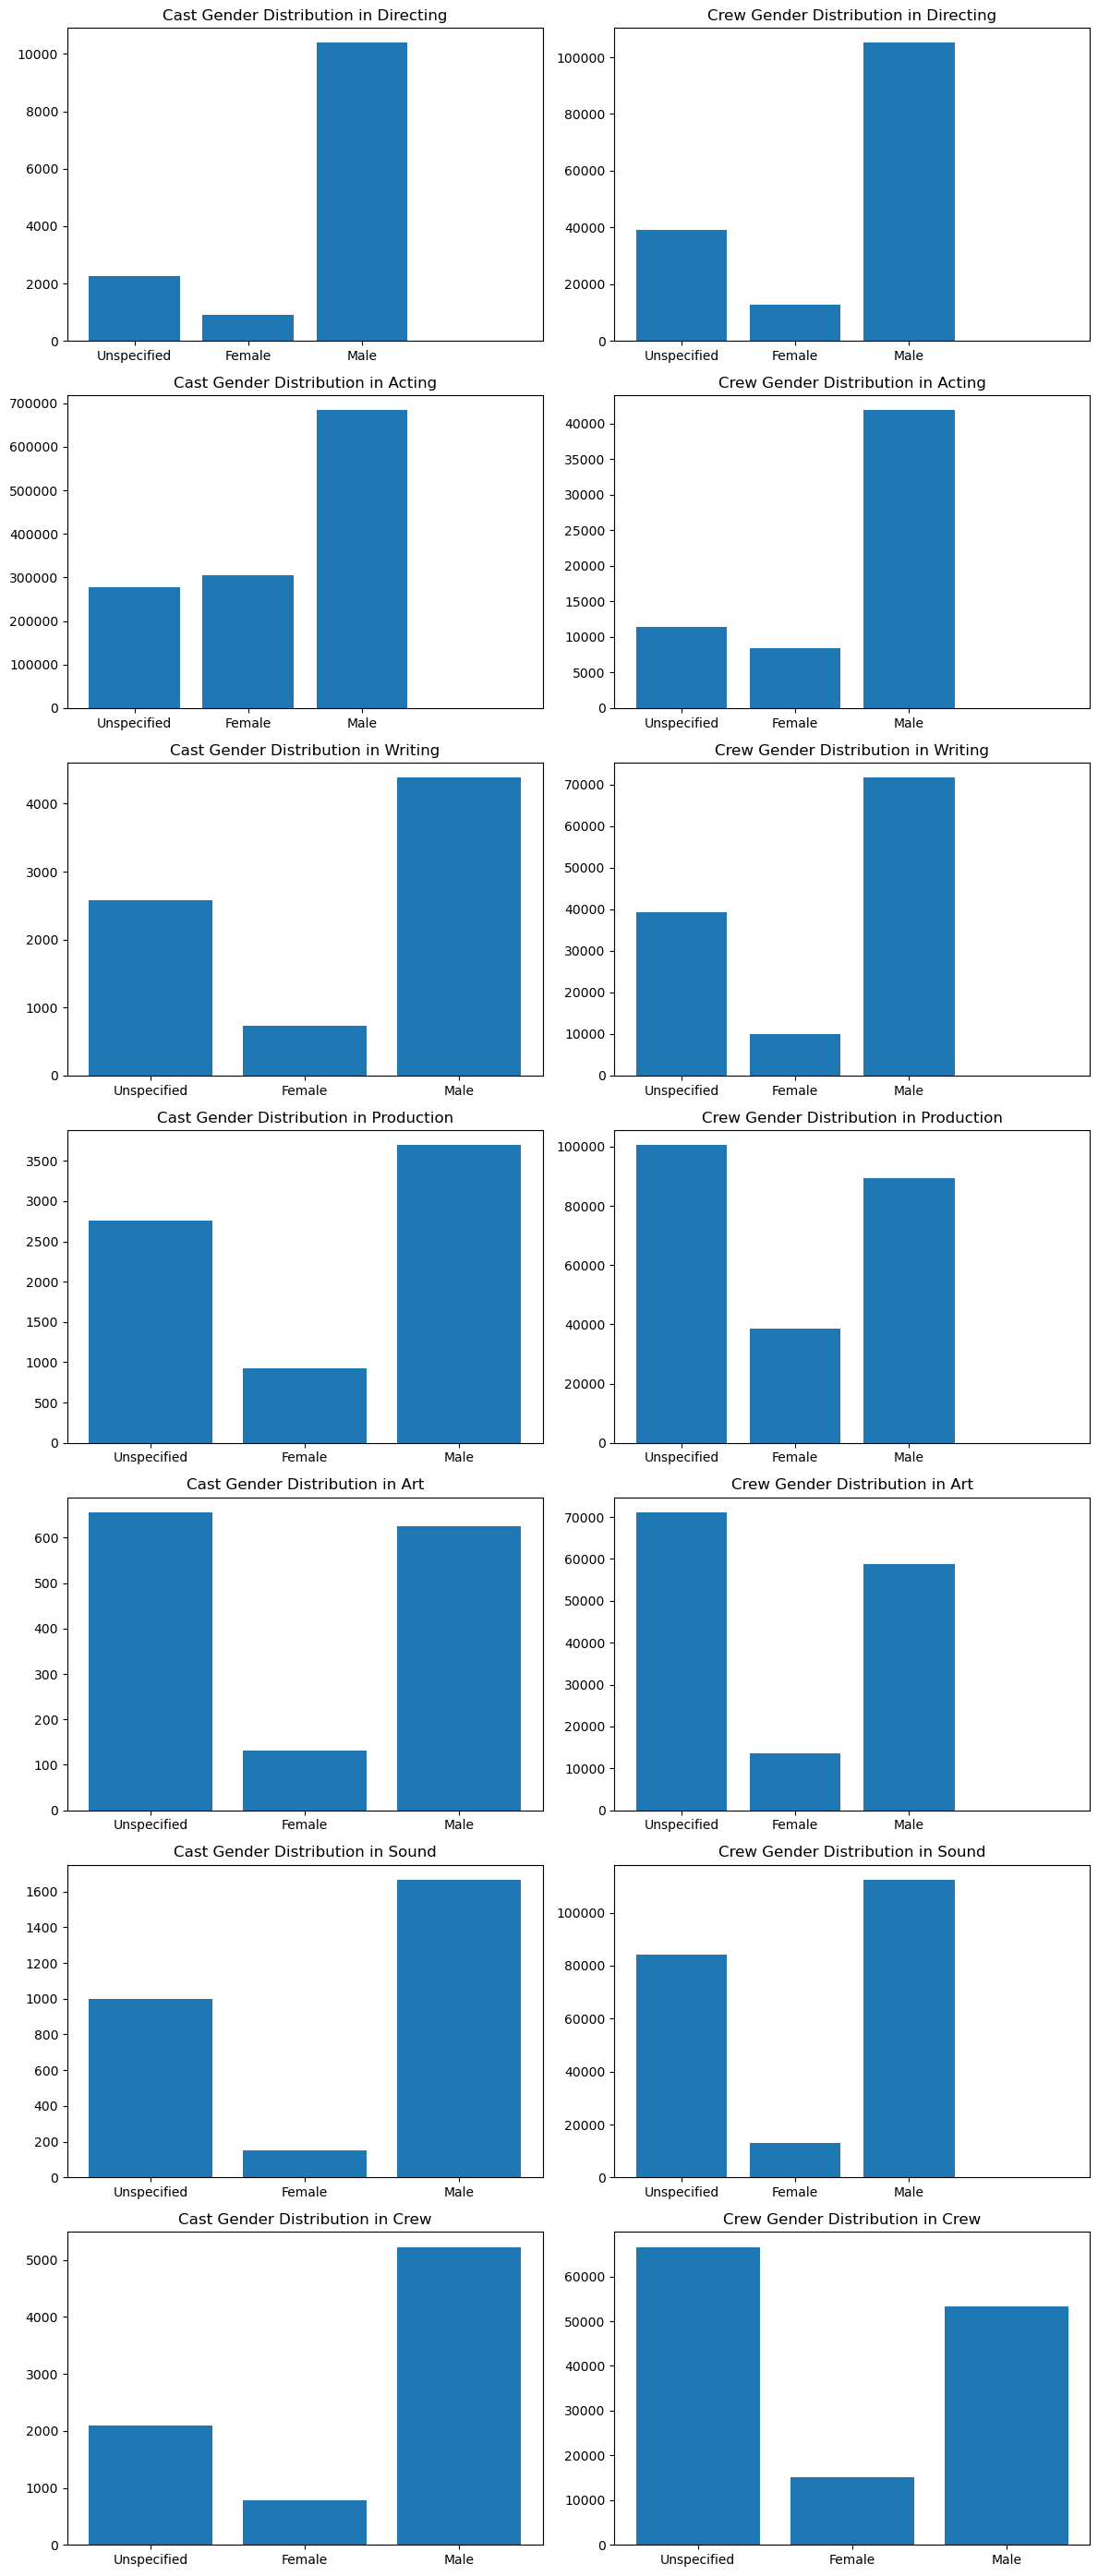

In [48]:
# Plotting
fig, axes = plt.subplots(len(roles_of_interest), 2, figsize=(12, len(roles_of_interest) * 4))

for i, role in enumerate(roles_of_interest):
    axes[i, 0].bar(cast_gender_distribution[role].keys(), cast_gender_distribution[role].values())
    axes[i, 0].set_title(f'Cast Gender Distribution in {role}')
    axes[i, 0].set_xticks(ticks=[0, 1, 2], labels=['Unspecified', 'Female', 'Male'])

    axes[i, 1].bar(crew_gender_distribution[role].keys(), crew_gender_distribution[role].values())
    axes[i, 1].set_title(f'Crew Gender Distribution in {role}')
    axes[i, 1].set_xticks(ticks=[0, 1, 2], labels=['Unspecified', 'Female', 'Male'])

plt.tight_layout()
plt.show()

Bechdel test : a measure to assess the representation of women in films
The test involves three criteria:

1) Two Women: The movie must have at least two women in it.
2) Who Talk to Each Other: These women must talk to each other at some point.
3) About Something Besides a Man: Their conversation must be about something other than a man.

The data is taken from https://www.kaggle.com/datasets/alisonyao/movie-bechdel-test-scores.

Oscar award: 

Analyzing Oscar awards data by gender, focusing on nominee and winner gender proportions, revealing industry gender biases and progress towards equality in film awards.

The data is taken from https://www.kaggle.com/datasets/unanimad/the-oscar-award/data?select=the_oscar_award.csv.